In [1]:
import yfinance as yf
import pandas as pd
from ray import tune

from statsforecast import StatsForecast
from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoNHITS, AutoLSTM
from neuralforecast.losses.pytorch import MQLoss

from lib.statsforecast import preprocess_yf
from lib.utils import rv

In [2]:
data_path = "../data/tests/AAPL_2018-01-01_2022-12-13_1d.pkl"
df = pd.read_pickle(data_path)

ppd = preprocess_yf(df, rv, yfunc_kwargs={"window": 5})

In [5]:
ppd.dropna(inplace=True)
ppd.loc[:, 'unique_id'] = 'AAPL'

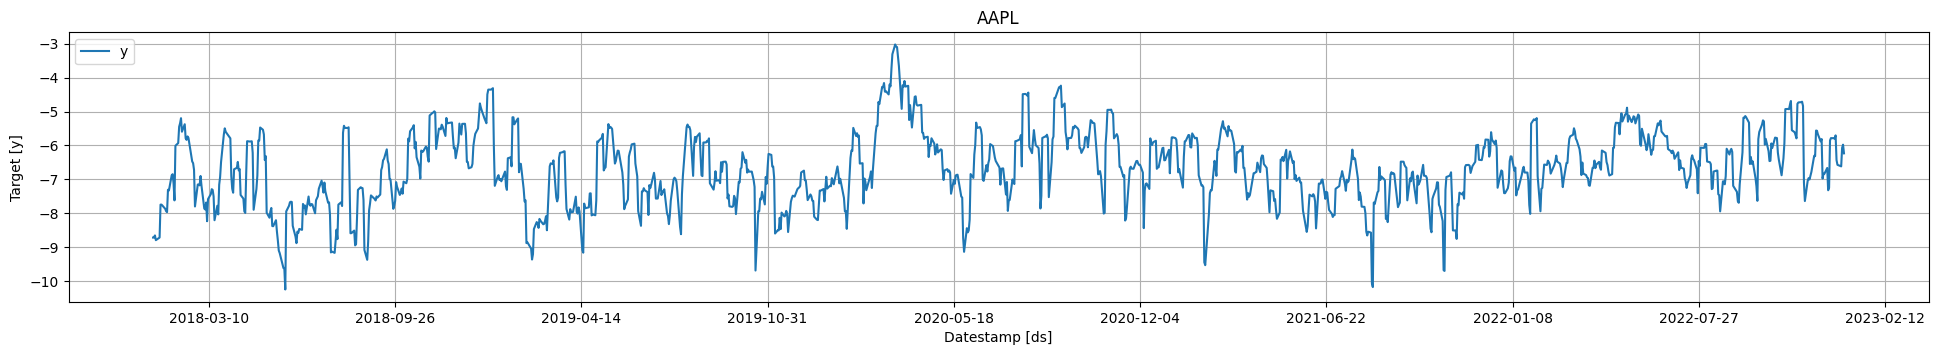

In [6]:
StatsForecast.plot(ppd)

In [6]:
config_nhits = {
    "input_size": tune.choice([48, 48*2, 48*3]),              # Length of input window
    "start_padding_enabled": True,
    "n_blocks": 5*[1],                                              # Length of input window
    "mlp_units": 5 * [[64, 64]],                                  # Length of input window
    "n_pool_kernel_size": tune.choice([5*[1], 5*[2], 5*[4],         
                                      [8, 4, 2, 1, 1]]),            # MaxPooling Kernel size
    "n_freq_downsample": tune.choice([[8, 4, 2, 1, 1],
                                      [1, 1, 1, 1, 1]]),            # Interpolation expressivity ratios
    "learning_rate": tune.loguniform(1e-4, 1e-2),                   # Initial Learning rate
    "scaler_type": tune.choice([None]),                             # Scaler type
    "max_steps": tune.choice([1000]),                               # Max number of training iterations
    "batch_size": tune.choice([1, 4, 10]),                          # Number of series in batch
    "windows_batch_size": tune.choice([128, 256, 512]),             # Number of windows in batch
    "random_seed": tune.randint(1, 20),                             # Random seed
}

config_lstm = {
    "input_size": tune.choice([48, 48*2, 48*3]),              # Length of input window
    "encoder_hidden_size": tune.choice([64, 128]),            # Hidden size of LSTM cells
    "encoder_n_layers": tune.choice([2,4]),                   # Number of layers in LSTM
    "learning_rate": tune.loguniform(1e-4, 1e-2),             # Initial Learning rate
    "scaler_type": tune.choice(['robust']),                   # Scaler type
    "max_steps": tune.choice([500, 1000]),                    # Max number of training iterations
    "batch_size": tune.choice([1, 4]),                        # Number of series in batch
    "random_seed": tune.randint(1, 20),                       # Random seed
}

In [7]:
nf = NeuralForecast(
    models=[
        AutoLSTM(h=1, config=config_lstm, loss=MQLoss(), num_samples=1),
    ],
    freq='D'
)

In [8]:
nf.fit(df=ppd)

(_train_tune pid=39591) Global seed set to 1


Sanity Checking: 0it [00:00, ?it/s]m 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 69.96it/s, v_num=0, train_loss_step=0.298, train_loss_epoch=0.242]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 69.60it/s, v_num=0, train_loss_step=0.236, train_loss_epoch=0.278, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 66.54it/s, v_num=0, train_loss_step=0.637, train_loss_epoch=0.345, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 68.45it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_

(_train_tune pid=39591) Global seed set to 13


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 53.86it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 76.79it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 82.97it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 69.52it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
(_train_tune pid=39591) 
Validation: 0it [00:00, ?it/s] 
(_train_tune pid=39591) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 82.60it

(_train_tune pid=39591) Global seed set to 13


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 93.54it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 92.95it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 86.02it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 82.12it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 95.40it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 599: 100%|██████████| 

(_train_tune pid=39591) Global seed set to 17


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 36.54it/s, v_num=0, train_loss_step=0.299, train_loss_epoch=0.234]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 50.58it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 50.03it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 50.09it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 48.44it/s, v_num=0, train_loss_step=0.000, train_loss_epo

(_train_tune pid=39591) Global seed set to 6


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 74.23it/s, v_num=0, train_loss_step=0.241, train_loss_epoch=0.469]
Validation: 0it [00:00, ?it/s] 
(_train_tune pid=39591) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 70.93it/s, v_num=0, train_loss_step=0.317, train_loss_epoch=0.350, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 63.25it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 71.69it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 73.23it/s, v_num=0, train_loss_s

(_train_tune pid=39591) Global seed set to 5


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 60.02it/s, v_num=0, train_loss_step=0.326, train_loss_epoch=0.329]
(_train_tune pid=39591) 
Validation: 0it [00:00, ?it/s] 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 55.90it/s, v_num=0, train_loss_step=0.239, train_loss_epoch=0.338, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 63.72it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 67.06it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 66.49it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
(_train_tune pid=39591) 
Validation

(_train_tune pid=39591) Global seed set to 10


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 131.96it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 124.66it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
(_train_tune pid=39591) 
Validation: 0it [00:00, ?it/s] 
(_train_tune pid=39591) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 121.65it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 123.58it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00

(_train_tune pid=39591) Global seed set to 2


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 68.18it/s, v_num=0, train_loss_step=0.258, train_loss_epoch=0.277]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 72.37it/s, v_num=0, train_loss_step=0.316, train_loss_epoch=0.266, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 70.25it/s, v_num=0, train_loss_step=0.270, train_loss_epoch=0.361, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 77.51it/s, v_num=0, train_loss_step=0.226, train_loss_epoch=0.250, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 69.14it/s, v_num=0, train_loss_step=0.292, train_loss_epo

(_train_tune pid=39591) Global seed set to 7


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 76.62it/s, v_num=0, train_loss_step=0.217, train_loss_epoch=0.218]
Validation: 0it [00:00, ?it/s] 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 72.81it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 72.89it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 73.80it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 76.07it/s, v_num=0, train_loss_step=0.000, train_loss_epo

(_train_tune pid=39591) Global seed set to 12


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 97.49it/s, v_num=0, train_loss_step=0.321, train_loss_epoch=0.362] 
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 101.00it/s, v_num=0, train_loss_step=0.263, train_loss_epoch=0.306, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 100.22it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 95.86it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000] 
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 499: 

(_train_tune pid=39591) Global seed set to 13


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 37.34it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 38.17it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 34.87it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
(_train_tune pid=39591) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 35.01it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pi

(_train_tune pid=39591) Global seed set to 11


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 95.40it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000]
(_train_tune pid=39591) 
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 119.32it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 97.14it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 14.63it/s]
(_train_tune pid=39591) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 113.99it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 

(_train_tune pid=39591) Global seed set to 1


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 68.43it/s, v_num=0, train_loss_step=0.228, train_loss_epoch=0.319]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 71.96it/s, v_num=0, train_loss_step=0.231, train_loss_epoch=0.229, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 64.92it/s, v_num=0, train_loss_step=0.324, train_loss_epoch=0.429, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 65.95it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 67.02it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
(_train_tune pid=39591) 
Validation: 0it [00:00, ?it/s] 
Epo

(_train_tune pid=39591) Global seed set to 5


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 48.79it/s, v_num=0, train_loss_step=0.307, train_loss_epoch=0.427]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 47.73it/s, v_num=0, train_loss_step=0.238, train_loss_epoch=0.249, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 43.21it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 36.17it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 499: 100%

(_train_tune pid=39591) Global seed set to 12


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 114.22it/s, v_num=0, train_loss_step=0.245, train_loss_epoch=0.208]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 105.75it/s, v_num=0, train_loss_step=0.224, train_loss_epoch=0.253, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 118.76it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 117.85it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 106.57it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Epoch 599: 100%|███████

(_train_tune pid=39591) Global seed set to 7


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 102.30it/s, v_num=0, train_loss_step=0.286, train_loss_epoch=0.224]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 90.78it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000] 
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 99.40it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000] 
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 57.94it/s, v_num=0, train_loss_step=0.000, train_loss_epoch=0.000, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 499: 1

(_train_tune pid=39591) Global seed set to 1


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 38.20it/s, v_num=0, train_loss_step=0.382, train_loss_epoch=0.256]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=39591) 
Epoch 103:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.219, train_loss_epoch=0.219, valid_loss=0.000]        


2023-10-03 20:23:25,805	WARNING tune.py:194 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 


Epoch 193:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.233, train_loss_epoch=0.233, valid_loss=0.000]        


2023-10-03 20:23:27,744	WARNING tune.py:1158 -- Experiment has been interrupted, but the most recent state was saved.
Resume experiment with: Tuner.restore(path="/Users/beneverman/ray_results/_train_tune_2023-10-03_20-19-25", trainable=...)


Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 45.16it/s, v_num=0, train_loss_step=0.229, train_loss_epoch=0.370, valid_loss=0.000]
Validation: 0it [00:00, ?it/s] 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=39591) /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/resource_tracker.py:224: UserWarning: resource_tracker: There appear to be 1 leaked semaphore objects to clean up at shutdown
(_train_tune pid=39591)   warnings.warn('resource_tracker: There appear to be %d '
2023-10-03 20:23:27,841	WARNING experiment_analysis.py:205 -- Failed to fetch metrics for 3 trial(s):
- _train_tune_7e4b2_00017: FileNotFoundError('Could not fetch metrics for _train_tune_7e4b2_00017: both result.json and progress.csv were not found at /Users/beneverman/ray_results/_train_tune_2023-10-03_20-19-25/_train_tune_7e4b2_00017_17_batch_size=1,encoder_hidden_size=128,encoder_n_layers=4,input_size=144,learning_rate=0.0004,max_steps=5_2023-10-03_20-19-35')
- _train_tune_7e4b2_00018: FileNotFoundError('Could not fetch metrics for _train_tune_7e4b2_00018: both result.json and progress.csv were not found at /Users/beneverman/ray_results/_train_tune_2023-10-03_20-19-25/_tra

(_train_tune pid=39591) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  9.79it/s, v_num=0, train_loss_step=0.229, train_loss_epoch=0.370, valid_loss=0.000]


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]